# Information Theory visualized: Multinomial Logistic Regression

This notebook visualizes multinomial logistic regression for XOR-arranged k=4 classes, with m=2 attributes
for different 1D projections and different regularizations

First version: 11/11/2024
This version: 11/12/2024
https://northeastern-datalab.github.io/cs7840/fa24/calendar.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.linear_model import LogisticRegression

## 1. Create a grid of 100x100 points for A and B features

In [2]:
# --- Parameter choices
filetype="png"
colormap = 'jet'
C = 1e10     # regularizer
CHOICE_CLASSIFICATION = 1       # choose the decision boundaries in the labeled data
CHOICE_CUT = 1                  # choose a 1D-cut through the x1/x2 space



# --- 1. Create a grid of 100x100 points for A and B features
a_values = np.linspace(0, 1, 10)
b_values = np.linspace(0, 1, 10)
a, b = np.meshgrid(a_values, b_values)
a = a.flatten()
b = b.flatten()

# Define the classification based on the quadrant and create data frame
if CHOICE_CLASSIFICATION == 1:
    classification = np.where((a < 0.5) & (b < 0.5), 0,      # Lower left quadrant
                              np.where((a < 0.5) & (b >= 0.5), 1,   # Upper left quadrant
                                       np.where((a >= 0.5) & (b < 0.5), 2,  # Lower right quadrant
                                                3)))  # Upper right quadrant
elif CHOICE_CLASSIFICATION == 2:
    classification = np.where((a < 0.5) & (b < 0.6), 0,      # Lower left quadrant
                          np.where((a < 0.5) & (b >= 0.5), 1,   # Upper left quadrant
                                   np.where((a >= 0.5) & (b < 0.4), 2,  # Lower right quadrant
                                            3)))  # Upper right quadrant

df = pd.DataFrame({'A': a, 'B': b, 'Class': classification})
print(df)

           A    B  Class
0   0.000000  0.0      0
1   0.111111  0.0      0
2   0.222222  0.0      0
3   0.333333  0.0      0
4   0.444444  0.0      0
..       ...  ...    ...
95  0.555556  1.0      3
96  0.666667  1.0      3
97  0.777778  1.0      3
98  0.888889  1.0      3
99  1.000000  1.0      3

[100 rows x 3 columns]


## 2. Visualize the data points

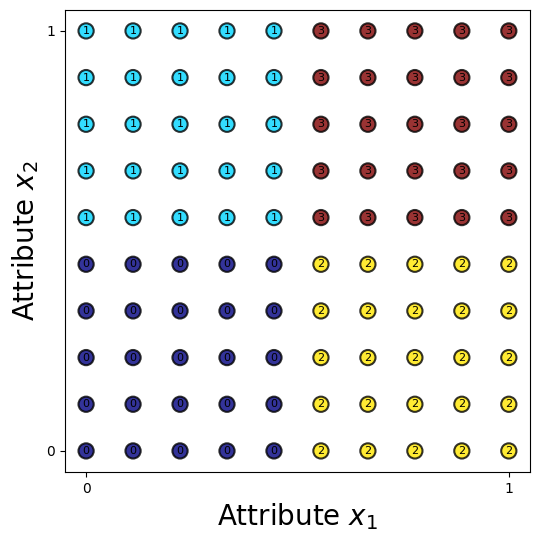

In [3]:
plt.figure(figsize=(6, 6))

scatter = plt.scatter(df['A'], df['B'], c=df['Class'],
                      cmap=colormap, edgecolor='k',
                      s=120, linewidth=1.5, marker='o', alpha=0.8)

# Adding labels for each data point based on classification
for i, row in df.iterrows():
    label = int(row['Class'])
    plt.text(row['A'], row['B'], label, ha='center', va='center', fontsize=8, color='black')

# Setting axis labels with only 0 and 1 shown
plt.xticks([0, 1])
plt.yticks([0, 1])
plt.xlabel('Attribute $x_1$', fontsize=20)
plt.ylabel('Attribute $x_2$', fontsize=20)

# Save the plot as a PDF
filename = "Fig_208_multinomial_regression_dataframe"
plt.savefig("figures/" + filename + "." + filetype,
            format=filetype,
            dpi=None,
            edgecolor='w',
            orientation='portrait',
            transparent=False,
            bbox_inches='tight',
            pad_inches=0.05)
plt.show()

## 3. Train a multinomial logistic regression model

In [4]:
# Separate features and target
X = df[['A', 'B']].values
y = df['Class'].values

# Create and train the model
model = LogisticRegression(solver='lbfgs', C=C)
model.fit(X, y)

# Print the learned parameters
print("\nCoefficients (weights) of the model for each class:\n", model.coef_)
print("\nIntercepts for each class:\n", model.intercept_)

# # Example prediction for a new point
# point = np.array([[0.2, 0.3]])  # A=x1, B=x2 coordinates
#
# prediction = model.predict(point)
# print("\nPredicted class for point (x1=0.2, x2=0.3):", prediction[0])
#
# probabilities = model.predict_proba(point)
# print("Class probabilities for point (x1=0.2, x2=0.3):", probabilities[0])


Coefficients (weights) of the model for each class:
 [[-56.75025915 -56.75025905]
 [-59.20170629  60.67451529]
 [ 60.67451606 -59.20170584]
 [ 55.27744938  55.2774496 ]]

Intercepts for each class:
 [ 57.03176525  -1.39353969  -1.39353859 -54.24468698]


## 4. Visualize decision boundaries

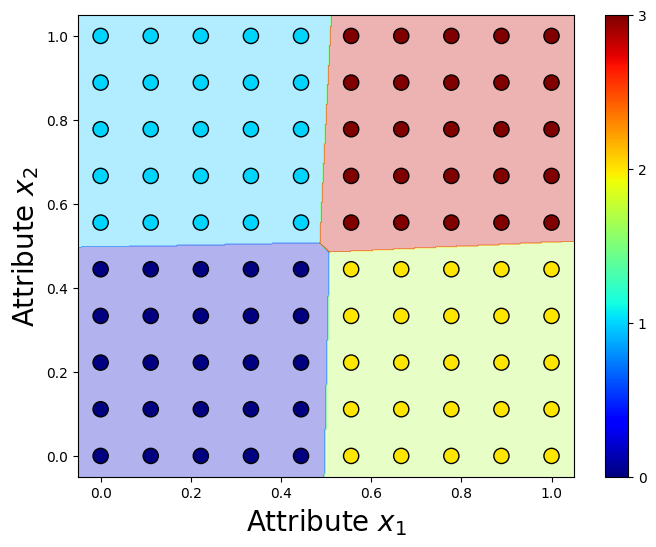

In [5]:
# Create a dense grid
x_min, x_max = -0.05, 1.05
y_min, y_max = -0.05, 1.05
num = 500

xx, yy = np.meshgrid(np.linspace(x_min, x_max, num=num), np.linspace(y_min, y_max, num=num))
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Predict the class for each point in the dense grid
Z = model.predict(grid_points)
Z = Z.reshape(xx.shape)

# Plot the decision boundaries and data points
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=colormap)

# Plot original data points with their class labels
scatter = plt.scatter(df['A'], df['B'], c=df['Class'], cmap=colormap, edgecolor='k', s=120)
plt.colorbar(scatter, ticks=[0, 1, 2, 3])
plt.xlabel('Attribute $x_1$', fontsize=20)
plt.ylabel('Attribute $x_2$', fontsize=20)

# Save the plot
filename = "Fig_208_multinomial_regression_decision_boundary"
plt.savefig("figures/" + filename + "." + filetype,
            format=filetype,
            dpi=None,
            edgecolor='w',
            orientation='portrait',
            transparent=False,
            bbox_inches='tight',
            pad_inches=0.05)
plt.show()

## 5. Create a cut through the prediction landscape and make a 1D plot

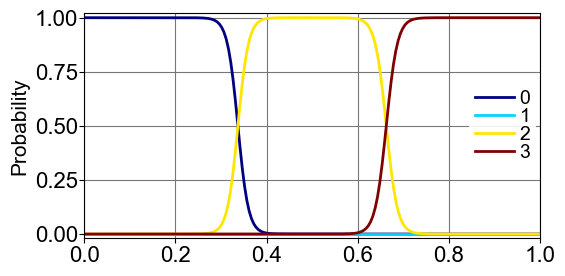

In [6]:
# First parameterize the x1 and x2 coordinates by a parameter theta in [0, 1]
if CHOICE_CUT == 1:
    def x_fct(theta):
        return 0.25 + 0.75*theta
    def y_fct(theta):
        return 0.75*theta

elif CHOICE_CUT == 2:
    def x_fct(theta):
        return theta
    def y_fct(theta):
        return theta

elif CHOICE_CUT == 3:
    def x_fct(theta):
        return theta
    def y_fct(theta):
        return 0.75 + 0*theta

low = 0
high = 1
num = 200
theta = np.linspace(low, high, num)         # parameterized x-axis

x_vec = np.array([x_fct(theta), y_fct(theta)])      # create x1 and x2 coordinates, parameterized by theta


# Calculuate the probabilities as function of the parameter theta in [0, 1]
coef = model.coef_
intercept = model.intercept_

logit = coef.dot(x_vec) + intercept[:, None]
y_vec = np.exp(logit)
p_vec = y_vec / y_vec.sum(axis=0)


# Plot item response curves based on theta in [0, 1]
mpl.rc('font', **{'family': 'sans-serif', 'sans-serif': [u'Arial', u'Liberation Sans']})
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['legend.fontsize'] = 14  # 6
mpl.rcParams['grid.color'] = '777777'  # grid color
mpl.rcParams['xtick.major.pad'] = 2  # padding of tick labels: default = 4
mpl.rcParams['ytick.major.pad'] = 1  # padding of tick labels: default = 4
mpl.rcParams['xtick.direction'] = 'out'  # default: 'in'
mpl.rcParams['ytick.direction'] = 'out'  # default: 'in'
mpl.rcParams['axes.titlesize'] = 16
fig = plt.figure(figsize=(6, 3))
ax = fig.add_axes([0.18, 0.17, 0.76, 0.75])   # [left, bottom, width, height]

cmap = plt.get_cmap(colormap, 4)        # Get a colormap instance

for i, yi in enumerate(p_vec):
    plt.plot(theta, yi,
             label='{}'.format(i),
             linewidth=2,
             color=cmap(i))

plt.xlim(low, high)
plt.ylim(-0.02, 1.02)
plt.grid(True)
plt.ylabel(r'Probability', fontsize=15)

handles, labels = ax.get_legend_handles_labels()
legend = plt.legend(handles, labels,
                    # loc=legend_location,  # 'upper right'
                    handlelength=2,
                    labelspacing=0,  # distance between label entries
                    handletextpad=0.3,  # distance between label and the line representation
                    borderaxespad=0.2,  # distance between legend and the outer axes
                    borderpad=0.3,  # padding inside legend box
                    numpoints=1,  # put the marker only once
                    )
frame = legend.get_frame()
frame.set_linewidth(0.0)
frame.set_alpha(0.9)  # 0.8

plt.savefig("figures/" + "Fig_208_multinomial_cut." + filetype,
                format=filetype,
                dpi=None,
                edgecolor='w',
                orientation='portrait',
                transparent=False,
                bbox_inches='tight',
                pad_inches=0.05)
plt.show()